# A6 - 6.4 - Wellness Supplement Sales - Machine Learning - Regression Analysis

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Defining the path to the main project folder

path = r'C:\Users\psalo\OneDrive\Study\CF - DA Immersion\A6 - Advanced Analytics & Dashboard Design\A6 - Wellness Supplement Sales Analysis'

In [5]:
# Importing the supplement_sales data

df_supplement = pd.read_csv(os.path.join(path, 'Data' , 'Supplement_Sales_Weekly_v2.csv'))

### 2. Data cleaning

In [6]:
df_supplement.columns

Index(['date', 'product', 'category', 'unit_sold', 'price', 'revenue',
       'discount', 'unit_returned', 'location', 'platform'],
      dtype='object')

In [7]:
df_supplement.head(20)

,date,product,category,unit_sold,price,revenue,discount,unit_returned,location,platform
0,1/6/2020,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,1/6/2020,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,1/6/2020,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,1/6/2020,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,1/6/2020,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb
5,1/6/2020,BCAA,Amino Acid,154,41.19,6343.26,0.13,1,UK,Walmart
6,1/6/2020,Creatine,Performance,134,32.49,4353.66,0.05,1,UK,Walmart
7,1/6/2020,Zinc,Mineral,147,46.68,6861.96,0.19,0,Canada,Amazon
8,1/6/2020,Collagen Peptides,Protein,147,10.96,1611.12,0.06,2,USA,Amazon
9,1/6/2020,Magnesium,Mineral,134,20.76,2781.84,0.00,0,Canada,Amazon


In [8]:
df_supplement.shape

(4384, 10)

#### Missing values

In [9]:
# Check for missing values

df_supplement.isnull().sum()

# No missing values to handle

date             0
product          0
category         0
unit_sold        0
price            0
revenue          0
discount         0
unit_returned    0
location         0
platform         0
dtype: int64

#### Duplicates check

In [10]:
dups = df_supplement.duplicated()

In [11]:
dups.shape # No duplicates

(4384,)

#### Extreme values checks

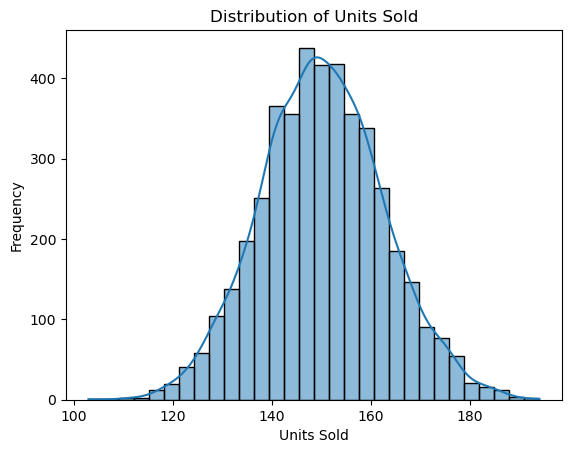

In [12]:
# Distribution chart for Unit_sold column

sns.histplot(df_supplement['unit_sold'], bins=30, kde=True)
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.title('Distribution of Units Sold')
plt.show()

In [13]:
#Checking mean

df_supplement['unit_sold'].mean() 

np.float64(150.20027372262774)

In [14]:
#Checking median

df_supplement['unit_sold'].median() 

150.0

In [15]:
#Checking max

df_supplement['unit_sold'].max() 

194

In [16]:
#Checking min

df_supplement['unit_sold'].min() 

103

### 3. Data Prep for Regression Analysis

#### Creating a scatterplot with two variables - price and unit_sold. 

Hypothesis - when price is lower the unit_sold is higher. 

price is independent variable X and unit_sold is dependent variable y


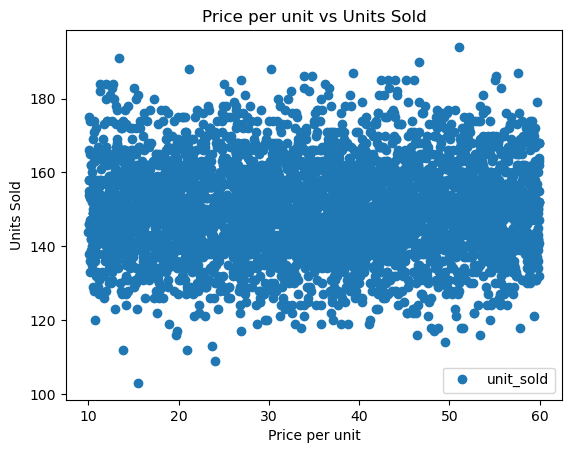

In [18]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_supplement.plot(x = 'price', y='unit_sold',style='o') 
plt.title('Price per unit vs Units Sold')  
plt.xlabel('Price per unit')  
plt.ylabel('Units Sold')  
plt.show()

In [19]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_supplement['price'].values.reshape(-1,1)
y = df_supplement['unit_sold'].values.reshape(-1,1)

In [20]:
# Checkign out X

X

array([[31.98],
       [42.51],
       [12.91],
       ...,
       [20.4 ],
       [18.31],
       [39.12]])

In [21]:
# Checking out y

y

array([[143],
       [139],
       [161],
       ...,
       [139],
       [154],
       [178]])

In [22]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Create a Regression Analysis

In [23]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [24]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

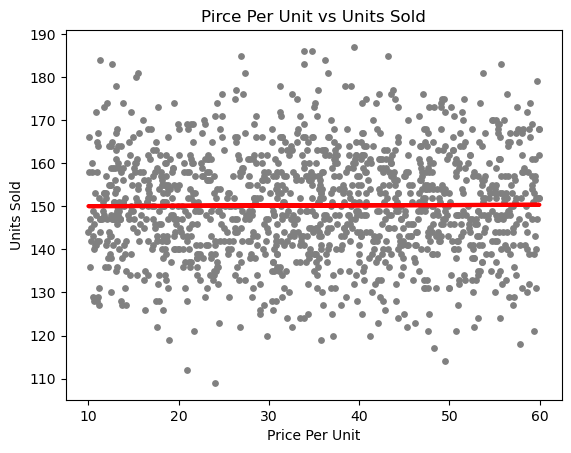

In [26]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Pirce Per Unit vs Units Sold')
plot_test.xlabel('Price Per Unit')
plot_test.ylabel('Units Sold')
plot_test.show()

In [27]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [28]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00632569]]
Mean squared error:  157.1340503472739
R2 score:  0.0003549940676365049


In [29]:
y_predicted

array([[150.19524444],
       [150.1806321 ],
       [150.17089055],
       ...,
       [150.1252191 ],
       [150.20144361],
       [150.0957414 ]])

In [30]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(20)

,Actual,Predicted
0,148,150.195244
1,143,150.180632
2,136,150.170891
3,140,150.269571
4,139,150.122499
5,140,150.306260
6,148,150.147549
7,164,150.312270
8,157,150.049374
9,166,150.204606


### 4. Regression analysis

##### Compare how the regression fits the training set

In [31]:
# Predict

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [32]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [33]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00632569]]
Mean squared error:  152.09228254645376
R2 score:  5.281346534991016e-05


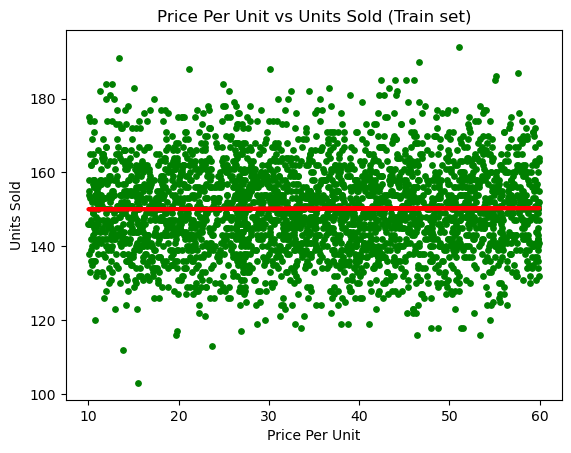

In [40]:
# Define filename and full path
filename = "price_vs_units_train.png"
save_path = os.path.join(path, "Visualizations", filename)

# Create and save the plot
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s=15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth=3)
plot_test.title('Price Per Unit vs Units Sold (Train set)')
plot_test.xlabel('Price Per Unit')
plot_test.ylabel('Units Sold')

plot_test.savefig(save_path, dpi=300, bbox_inches='tight')  # Save BEFORE showing
plot_test.show()
plot_test.close()


### Insights:

Observations:

1. Flat Regression Line - The line is horizontal, showing no significant linear relationship between price and unit_sold. It means that price has no impact on the number of units sold in general.
2. Most Number of units sold stays dispersed between 130 and 160 at any given price.
3. There is no clear trend here.

Suggestions: 
1. Relationship between other variables should be explored to see if any significant correlation exists. Like location (independent) and price (dependent) OR location and units_sold OR price and revenue
2. Marketing team can look into offers to increase the sales with price is lower or attrack the large volume buyers.
   